In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10,5)


In [7]:

import yfinance as yf
import pandas as pd

# Download adjusted price data
stock = yf.download("HDFCBANK.NS", period="5y", interval="1d", auto_adjust=True)
index = yf.download("^NSEI", period="5y", interval="1d", auto_adjust=True)

# Build clean DataFrame without rename()
df = pd.DataFrame()
df["HDFC_Close"] = stock["Close"]
df["NIFTY_Close"] = index["Close"]

# Align dates & drop missing values
df = df.dropna()

df.head()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,HDFC_Close,NIFTY_Close
Date,,
2020-11-09,634.868164,12461.049805
2020-11-10,660.015625,12631.099609
2020-11-11,658.263367,12749.150391
2020-11-12,649.620361,12690.799805
2020-11-13,643.511169,12719.950195


from matplotlib import pyplot as plt
_df_0['HDFC_Close'].plot(kind='hist', bins=20, title='HDFC_Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['NIFTY_Close'].plot(kind='hist', bins=20, title='NIFTY_Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='HDFC_Close', y='NIFTY_Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['HDFC_Close'].plot(kind='line', figsize=(8, 4), title='HDFC_Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['NIFTY_Close'].plot(kind='line', figsize=(8, 4), title='NIFTY_Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
# Compute daily percentage returns
returns = df.pct_change().dropna()
returns.head()


,HDFC_Close,NIFTY_Close
Date,,
2020-11-10,0.039611,0.013647
2020-11-11,-0.002655,0.009346
2020-11-12,-0.013130,-0.004577
2020-11-13,-0.009404,0.002297
2020-11-17,0.036539,0.012127


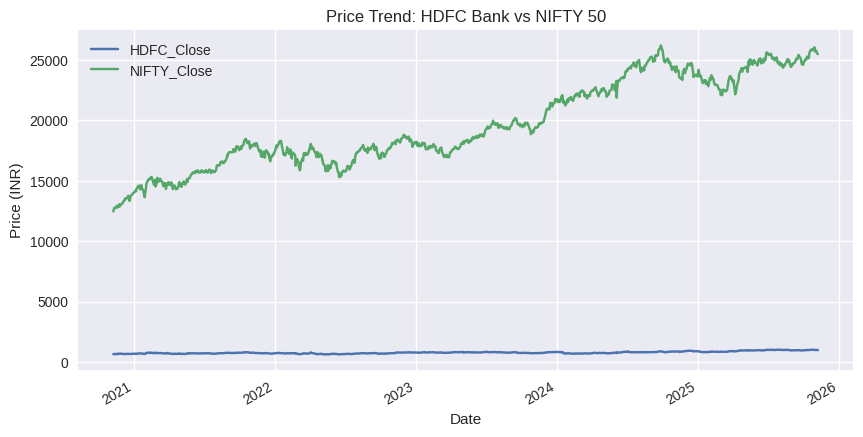

In [9]:
df.plot(title="Price Trend: HDFC Bank vs NIFTY 50")
plt.ylabel("Price (INR)")
plt.xlabel("Date")
plt.show()


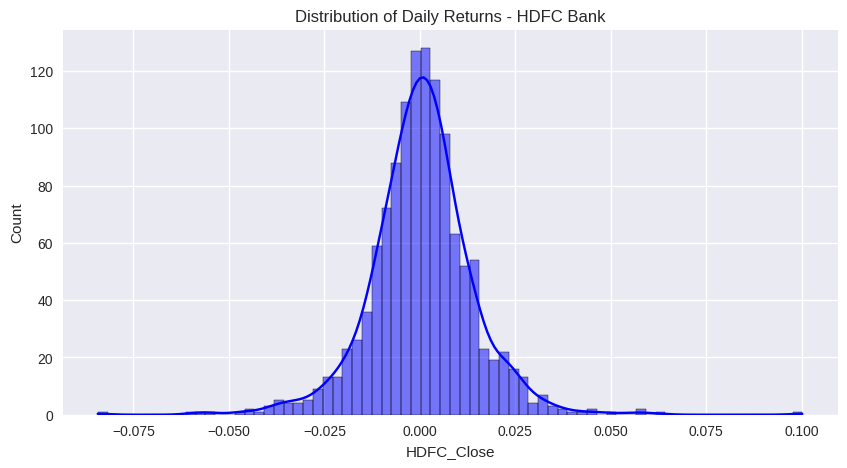

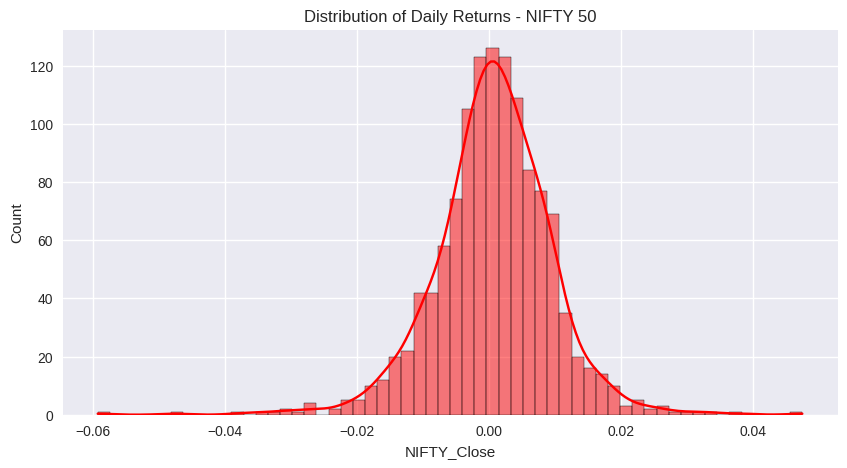

In [10]:
import seaborn as sns

sns.histplot(returns["HDFC_Close"], kde=True, color="blue")
plt.title("Distribution of Daily Returns - HDFC Bank")
plt.show()

sns.histplot(returns["NIFTY_Close"], kde=True, color="red")
plt.title("Distribution of Daily Returns - NIFTY 50")
plt.show()


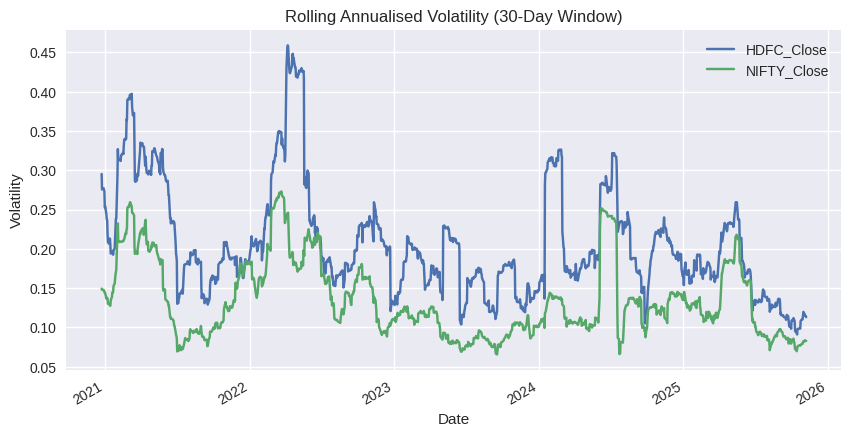

In [11]:
rolling_vol = returns.rolling(30).std() * np.sqrt(252)

rolling_vol.plot(title="Rolling Annualised Volatility (30-Day Window)")
plt.ylabel("Volatility")
plt.xlabel("Date")
plt.show()


                            OLS Regression Results                            
Dep. Variable:             HDFC_Close   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     1138.
Date:                Fri, 07 Nov 2025   Prob (F-statistic):          3.12e-177
Time:                        09:47:28   Log-Likelihood:                 3952.0
No. Observations:                1234   AIC:                            -7900.
Df Residuals:                    1232   BIC:                            -7890.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0002      0.000     -0.757      

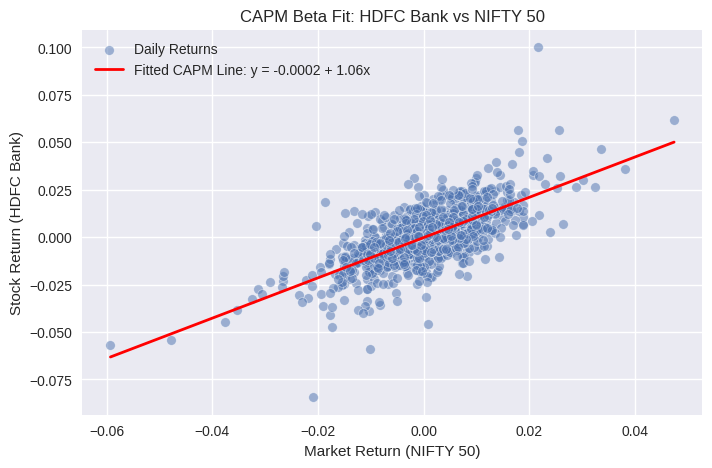

In [17]:
import statsmodels.api as sm

# Prepare variables
X = returns["NIFTY_Close"]    # Market return
y = returns["HDFC_Close"]     # Stock return

# Add constant for alpha
X = sm.add_constant(X)

# Run regression:  r_stock = α + β * r_market
model = sm.OLS(y, X).fit()
print(model.summary())
# Scatter plot + fitted line
plt.figure(figsize=(8,5))
sns.scatterplot(x=returns["NIFTY_Close"], y=returns["HDFC_Close"], alpha=0.5, label="Daily Returns")

# Fitted line
beta = model.params["NIFTY_Close"]
alpha = model.params["const"]
x_vals = np.linspace(returns["NIFTY_Close"].min(), returns["NIFTY_Close"].max(), 100)
y_vals = alpha + beta * x_vals

plt.plot(x_vals, y_vals, color="red", linewidth=2, label=f"Fitted CAPM Line: y = {alpha:.4f} + {beta:.2f}x")
plt.title("CAPM Beta Fit: HDFC Bank vs NIFTY 50")
plt.xlabel("Market Return (NIFTY 50)")
plt.ylabel("Stock Return (HDFC Bank)")
plt.legend()
plt.show()



In [15]:
cov_matrix = returns.cov()
market_var = returns["NIFTY_Close"].var()
beta = cov_matrix.loc["HDFC_Close", "NIFTY_Close"] / market_var

print(f"CAPM Beta of HDFC Bank vs NIFTY 50: {beta:.2f}")


CAPM Beta of HDFC Bank vs NIFTY 50: 1.06
